# Predicting behaviour to retain customer using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting the cutomer attrition.

## 1. Problem definition

> The  goal will be evaluate different models to predict if a customer will “Churn” or not.
For does not familiar churn is most commonly expressed as the percentage (or number) of service subscribers who discontinue their subscriptions within a given time period.

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/blastchar/telco-customer-churn.

The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

## 3. Evaluation
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 90% accuracy at predicting whether or not a customer will `churn`, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.
### Telco Customer Data Dictionary
* customerID
* gender (female, male)
* SeniorCitizen (Whether the customer is a senior citizen or not (1, 0))
* Partner (Whether the customer has a partner or not (Yes, No))
* Dependents (Whether the customer has dependents or not (Yes, No))
* tenure (Number of months the customer has stayed with the company)
* PhoneService (Whether the customer has a phone service or not (Yes, No))
* MultipleLines (Whether the customer has multiple lines r not (Yes, No, No phone service)
* InternetService (Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection (Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport (Whether the customer has tech support or not (Yes, No, No internet service)
* streamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service)
* streamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract (The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling (Whether the customer has paperless billing or not (Yes, No))
* PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)))
* MonthlyCharges (The amount charged to the customer monthly — numeric)
* TotalCharges (The total amount charged to the customer — numeric)
* Churn ( Whether the customer churned or not (Yes or No))

## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Import tarining and validation data
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape # (rows, columns)

(7043, 21)

## Data Exploration (exploratory data analysis or EDA)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your **data dictionary** and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.

In [4]:
# Info on the CSV data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Let's see how many yes and no samples we have in our dataframe and normalizing it
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

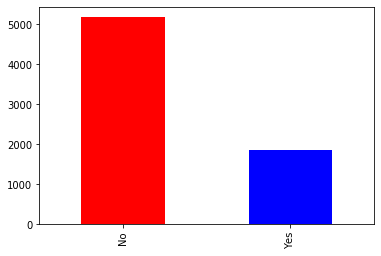

In [6]:
# Let's visualize the Churn column data
df.Churn.value_counts().plot.bar(stacked = True,color = ['red','blue']);

In [7]:
# Check if there are any null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**From above it is clear that there are no null values in the data**

In [8]:
# unique values in every columns
df.nunique(axis = 0)

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Decribe our DATAFRAME
The describe() function computes a summary of statistics pertaining to the DataFrame columns

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


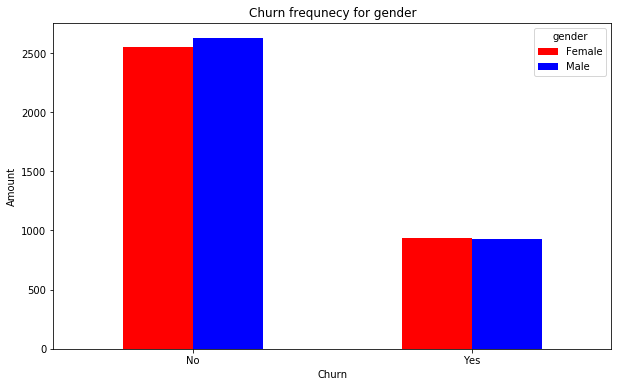

In [10]:
# Creating a cross tab between gender and Churns AND making a seaborn heatmap
cd = pd.crosstab(df.Churn,df.gender)
cd.plot.bar(figsize=(10,6), color=["red", "blue"])

# Adding Attributes
plt.title("Churn frequnecy for gender")
plt.ylabel("Amount")
plt.xticks(rotation = 0);

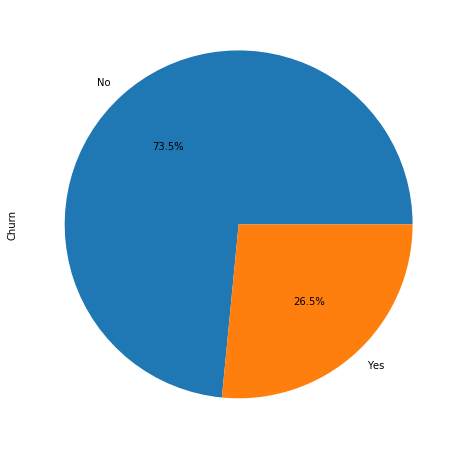

In [11]:
df.Churn.value_counts().plot(kind = "pie",autopct='%1.1f%%',figsize = (8,8));

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [12]:
# This will turn all the string values into categpory values
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Filling and turning categorical variables into numbersf.head()

In [14]:
# Check for all the non Numeric Data types
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [15]:
# Turn Categorical variables into numbers and fill missing
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes + 1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [17]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


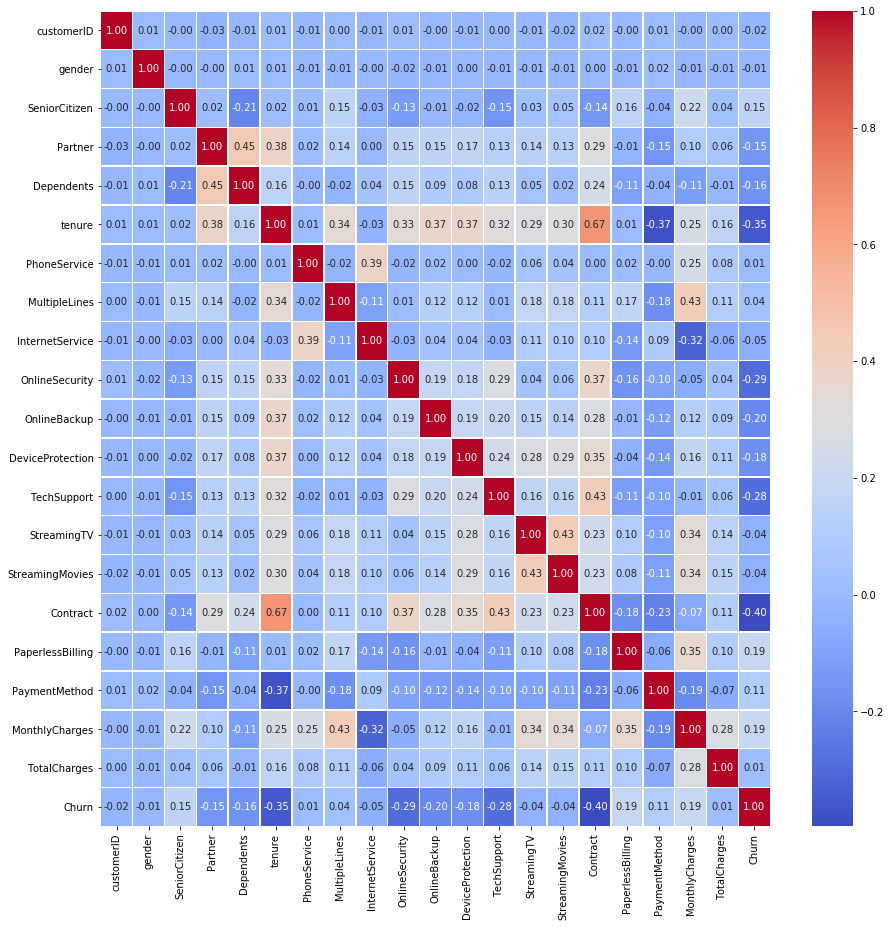

In [43]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt = '.2f',
                cmap = 'coolwarm');

## Modeling
* This section is a fundamental part of machine learning. If this section is not done properly, our model will not work. In this section we will clean up our dataset by dropping irrelevant data, treating missing values, and converting our variables to the proper data type.

* Treating Irrelevant data & missing values

* In our dataset, we can see that customer ID is not needed for our model so we drop the variable. We do not need to treat missing values as there are none in this dataset.

In [18]:
df.head().T

,0,1,2,3,4
customerID,5376.00,3963.00,2565.00,5536.0,6512.0
gender,1.00,2.00,2.00,2.0,1.0
SeniorCitizen,0.00,0.00,0.00,0.0,0.0
Partner,2.00,1.00,1.00,1.0,1.0
Dependents,1.00,1.00,1.00,1.0,1.0
tenure,1.00,34.00,2.00,45.0,2.0
PhoneService,1.00,2.00,2.00,1.0,2.0
MultipleLines,2.00,1.00,1.00,2.0,1.0
InternetService,1.00,1.00,1.00,1.0,2.0
OnlineSecurity,1.00,3.00,3.00,3.0,1.0


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [19]:
# Everything except Churn variable
X = df.drop("Churn", axis=1)

# Churn variable
y = df.Churn.values

In [20]:
#Let's see the data
X.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,5376.00,3963.00,2565.00,5536.0,6512.0,6552.00,1003.0,4771.00,5605.0,4535.00,...,6876.0,438.00,5996.0,5505.00,1759.00,4854.0,1526.0,3368.0,5935.0,2227.00
gender,1.00,2.00,2.00,2.0,1.0,1.00,2.0,1.00,1.0,2.00,...,2.0,1.00,2.0,1.00,1.00,2.0,1.0,1.0,2.0,2.00
SeniorCitizen,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00
Partner,2.00,1.00,1.00,1.0,1.0,1.00,1.0,1.00,2.0,1.00,...,1.0,1.00,1.0,1.00,1.00,2.0,2.0,2.0,2.0,1.00
Dependents,1.00,1.00,1.00,1.0,1.0,1.00,2.0,1.00,1.0,2.00,...,1.0,1.00,1.0,1.00,1.00,2.0,2.0,2.0,1.0,1.00
tenure,1.00,34.00,2.00,45.0,2.0,8.00,22.0,10.00,28.0,62.00,...,38.0,67.00,19.0,12.00,72.00,24.0,72.0,11.0,4.0,66.00
PhoneService,1.00,2.00,2.00,1.0,2.0,2.00,2.0,1.00,2.0,2.00,...,2.0,2.00,2.0,1.00,2.00,2.0,2.0,1.0,2.0,2.00
MultipleLines,2.00,1.00,1.00,2.0,1.0,3.00,3.0,2.00,3.0,1.00,...,1.0,3.00,1.0,2.00,1.00,3.0,3.0,2.0,3.0,1.00
InternetService,1.00,1.00,1.00,1.0,2.0,2.00,2.0,1.00,2.0,1.00,...,2.0,2.00,2.0,1.00,3.00,1.0,2.0,1.0,2.0,2.00
OnlineSecurity,1.00,3.00,3.00,3.0,1.0,1.00,1.0,3.00,1.0,3.00,...,1.0,3.00,1.0,1.00,2.00,3.0,1.0,3.0,1.0,3.00


In [21]:
y

array([1, 1, 2, ..., 1, 2, 1], dtype=int8)

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

In [22]:
# Create random seed
np.random.seed(42)

# Split the test and train data set
X_train,X_test,y_train,y_test = train_test_split(X,  # independent variables 
                                                 y,  # dependent variable
                                                test_size = 0.2) # percentage of data to use for test set

The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on. 

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).

But again, each problem will differ. The post, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas is a good place to go to learn more.

Let's look at our training data.

In [23]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,2957,1,0,1,2,21,2,1,1,3,1,3,1,1,3,2,1,4,64.85,611
1623,4288,1,0,1,1,54,2,3,2,1,3,1,1,3,3,3,2,1,97.20,4320
6074,2675,2,0,2,1,1,1,2,1,1,1,1,1,1,1,1,2,3,23.45,1941
1362,1757,2,0,1,1,4,2,1,2,1,1,1,1,1,1,1,2,3,70.20,2013
6754,1907,2,0,1,2,0,2,3,1,3,3,1,3,1,1,3,2,1,61.90,1


In [24]:
y_train, len(y_train)

(array([1, 1, 2, ..., 1, 2, 1], dtype=int8), 5634)

Beautiful, we can see we're using 5634 samples to train on. Let's look at our test data.

In [25]:
X_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,693,1,0,2,1,1,1,2,1,1,1,1,1,1,1,1,2,3,24.80,2045
2715,326,2,0,1,1,41,2,3,3,2,2,2,2,2,2,1,2,1,25.25,6523
3825,2528,1,0,2,2,52,2,1,3,2,2,2,2,2,2,3,1,4,19.35,68
1807,4912,1,0,1,1,1,2,1,2,1,1,3,1,1,1,1,1,3,76.35,5823
132,6059,2,0,1,1,67,2,1,1,1,1,1,3,1,1,3,1,1,50.55,2838


In [26]:
y_test, len(y_test)

(array([2, 1, 1, ..., 1, 1, 2], dtype=int8), 1409)

And we've got 1409 examples we'll test our model(s) on. Let's build some.

### MAKE A COPY OF PROCESSED DATA

In [27]:
df_temp = df.copy

## Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [28]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\rajat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6891412349183819,
 'Logistic Regression': 0.8126330731014905,
 'Random Forest': 0.7970191625266146}

## Model Comparison

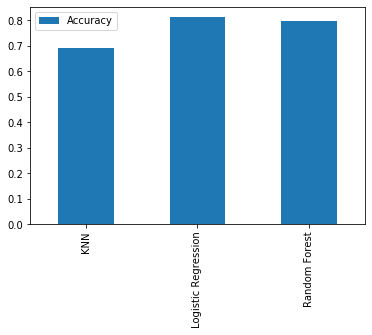

In [47]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [48]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [49]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [50]:
rs_log_reg.score(X_test, y_test)

0.8147622427253371

In [51]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [52]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8112136266855926

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [53]:
log_grid_cv = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                              param_grid=log_grid_cv,
                          cv=5,
                          verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.3s finished


In [76]:
gs_log_reg.best_params_

{'C': 10000.0, 'solver': 'liblinear'}

In [54]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8147622427253371

In [62]:
# Setup random seed
np.random.seed(42)

rf_grid = {"n_estimators": np.arange(10, 1000, 200),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=rf_grid,
                           cv=5,
                           n_jobs = -1,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 60.1min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 64.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [64]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 11,
 'min_samples_split': 2,
 'n_estimators': 210}

In [66]:
rs_rf.score(X_test,y_test)

0.8119233498935415

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [67]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [68]:
y_preds

array([2, 1, 1, ..., 1, 1, 1], dtype=int8)

In [69]:
y_test

array([2, 1, 1, ..., 1, 1, 2], dtype=int8)

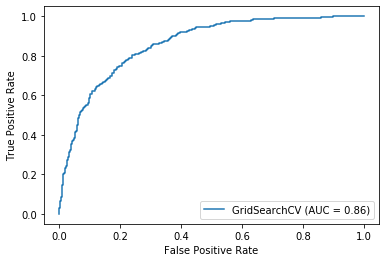

In [70]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [71]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[943  93]
 [168 205]]


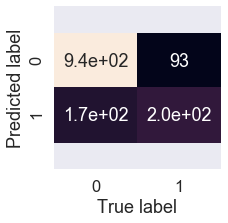

In [72]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [73]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.85      0.91      0.88      1036
           2       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [77]:
clf = LogisticRegression(C= 10000.0,
                         solver = 'liblinear')

In [79]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.80553584, 0.80908446, 0.78566359, 0.80113636, 0.80184659])

In [80]:
cv_acc.mean()

0.8006533687657269

In [81]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8383475590729947

In [82]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9027847391584671

In [83]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8693533148512602

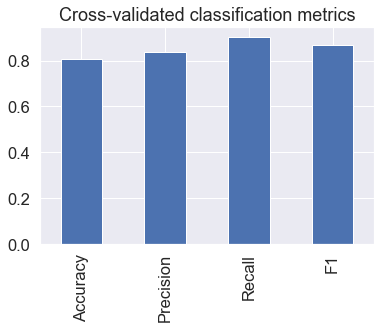

In [90]:
# Visualize the cross-validation metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1}
                          )

cv_metrics[:1].T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [92]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [93]:
# Check coef_
clf.coef_

array([[-1.25950910e-05, -4.11184303e-02,  2.32578415e-01,
         6.53283238e-02, -1.81291757e-01, -3.24410317e-02,
        -4.86453999e-01,  1.18887938e-01,  1.27935074e-01,
        -2.62423318e-01, -1.31151477e-01, -6.51560523e-02,
        -2.27649242e-01,  7.94635192e-03,  5.64861372e-02,
        -7.56641734e-01,  3.90390008e-01,  8.31559754e-02,
         2.32259954e-02,  5.86640135e-05]])

In [94]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'customerID': -1.2595091046860332e-05,
 'gender': -0.04111843027843025,
 'SeniorCitizen': 0.23257841532447981,
 'Partner': 0.0653283237664919,
 'Dependents': -0.18129175651905882,
 'tenure': -0.032441031681625584,
 'PhoneService': -0.4864539985778938,
 'MultipleLines': 0.11888793781916744,
 'InternetService': 0.12793507358503875,
 'OnlineSecurity': -0.2624233181998436,
 'OnlineBackup': -0.13115147660228,
 'DeviceProtection': -0.06515605234103043,
 'TechSupport': -0.22764924187617017,
 'StreamingTV': 0.007946351924488114,
 'StreamingMovies': 0.05648613717716457,
 'Contract': -0.7566417343387047,
 'PaperlessBilling': 0.3903900077011628,
 'PaymentMethod': 0.08315597540970311,
 'MonthlyCharges': 0.023225995356382704,
 'TotalCharges': 5.8664013476640525e-05}

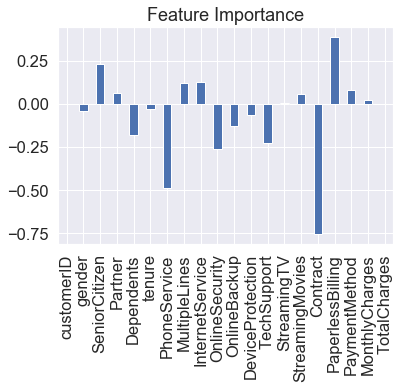

In [95]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);